In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
df = pd.read_excel('Global_Superstore2.xlsx' ,nrows=1000)
df.head() 


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [ ]:
df.shape


(1000, 24)

In [ ]:
df.isnull().sum()

Row ID              0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
City                0
State               0
Country             0
Postal Code       804
Market              0
Region              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Discount            0
Profit              0
Shipping Cost       0
Order Priority      0
dtype: int64

In [ ]:
boughts = df.groupby('Product Name').agg({'Quantity': 'sum'}).sort_values('Quantity',ascending=False)[:10]
boughts

,Quantity
Product Name,
"Motorola Smart Phone, Full Size",90
"Apple Smart Phone, Full Size",84
"Cisco Smart Phone, Full Size",76
"Harbour Creations Executive Leather Armchair, Adjustable",58
"Samsung Smart Phone, Cordless",55
"Hoover Stove, White",53
"Nokia Smart Phone, Full Size",52
"Samsung Smart Phone, VoIP",47
"Harbour Creations Executive Leather Armchair, Black",46


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Motorola Smart Phone, Full Size'),
  Text(1, 0, 'Apple Smart Phone, Full Size'),
  Text(2, 0, 'Cisco Smart Phone, Full Size'),
  Text(3, 0, 'Harbour Creations Executive Leather Armchair, Adjustable'),
  Text(4, 0, 'Samsung Smart Phone, Cordless'),
  Text(5, 0, 'Hoover Stove, White'),
  Text(6, 0, 'Nokia Smart Phone, Full Size'),
  Text(7, 0, 'Samsung Smart Phone, VoIP'),
  Text(8, 0, 'Harbour Creations Executive Leather Armchair, Black'),
  Text(9, 0, 'Hoover Stove, Red')])

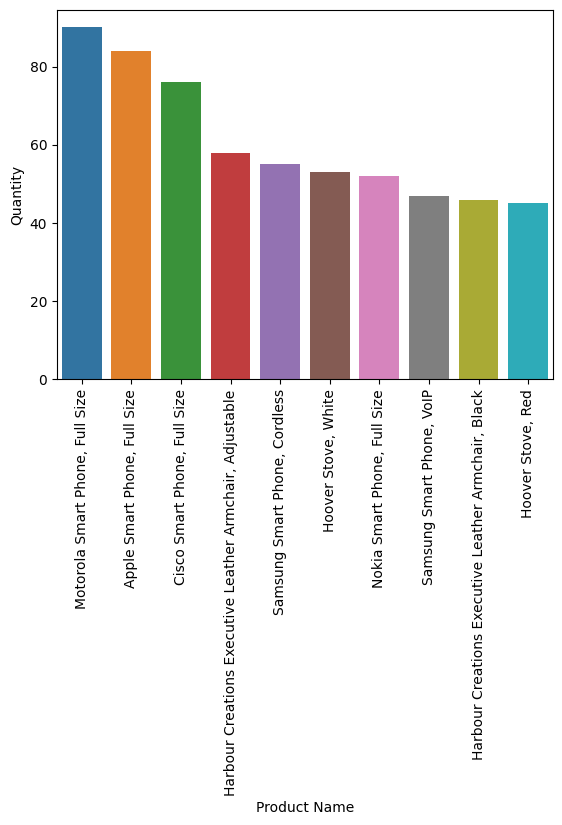

In [ ]:
sns.barplot(x='Product Name',y='Quantity',data=boughts.reset_index())
plt.xticks(rotation = 'vertical')

In [ ]:
productSales = pd.DataFrame(df.groupby('Product Name').sum()['Sales'])
productSales.sort_values(by=['Sales'], inplace=True, ascending=False)
productSales.head(10)

,Sales
Product Name,
"Motorola Smart Phone, Full Size",52406.3950
"Apple Smart Phone, Full Size",42303.4300
"Cisco Smart Phone, Full Size",41325.1996
Canon imageCLASS 2200 Advanced Copier,36399.8960
"Nokia Smart Phone, Full Size",27661.9740
"Samsung Smart Phone, Cordless",25438.5900
"Hoover Stove, Red",23477.8110
"Motorola Smart Phone, with Caller ID",23239.4400
"Harbour Creations Executive Leather Armchair, Adjustable",22145.7954


In [ ]:
profitable_products = pd.DataFrame(df.groupby(['Product Name']).sum()['Profit'])
profitable_products.sort_values(by=['Profit'], inplace = True, ascending = False)
profitable_products.head(10)

,Profit
Product Name,
Canon imageCLASS 2200 Advanced Copier,14559.9584
"Motorola Smart Phone, Full Size",14247.2950
"Hoover Stove, Red",10288.6110
"Cisco Smart Phone, Full Size",9662.9896
Hewlett Packard LaserJet 3310 Copier,6647.8892
"Cisco Smart Phone, with Caller ID",6607.3980
Ibico EPK-21 Electric Binding System,6274.7668
"Nokia Smart Phone, Full Size",5765.1240
"Harbour Creations Executive Leather Armchair, Adjustable",5552.6754


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Canon imageCLASS 2200 Advanced Copier'),
  Text(1, 0, 'Motorola Smart Phone, Full Size'),
  Text(2, 0, 'Hoover Stove, Red'),
  Text(3, 0, 'Cisco Smart Phone, Full Size'),
  Text(4, 0, 'Hewlett Packard LaserJet 3310 Copier'),
  Text(5, 0, 'Cisco Smart Phone, with Caller ID'),
  Text(6, 0, 'Ibico EPK-21 Electric Binding System'),
  Text(7, 0, 'Nokia Smart Phone, Full Size'),
  Text(8, 0, 'Harbour Creations Executive Leather Armchair, Adjustable'),
  Text(9, 0, 'Sauder Classic Bookcase, Traditional')])

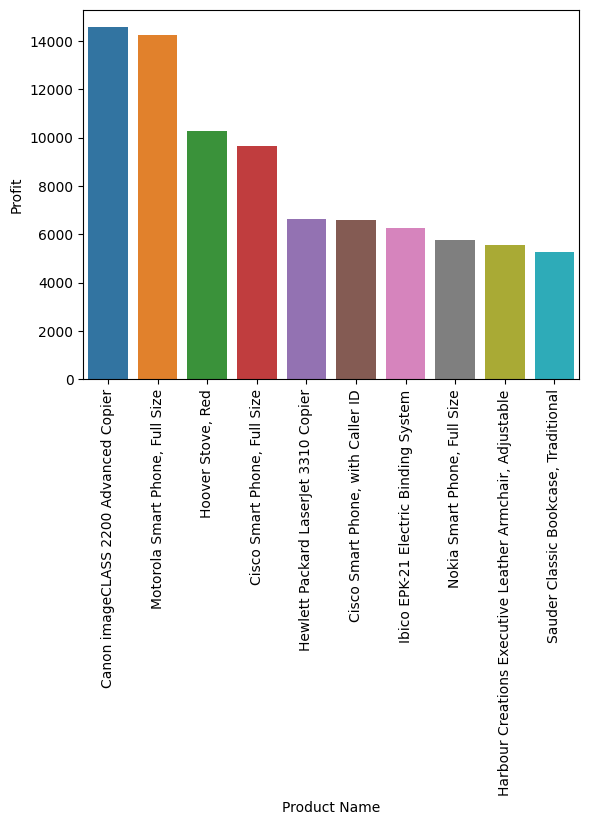

In [ ]:
sns.barplot(x='Product Name',y='Profit',data=profitable_products.head(10).reset_index())
plt.xticks(rotation = 'vertical')

In [ ]:
df.groupby(['Category','Sales']).sum()

Row ID  Postal Code  Quantity  Discount     Profit  \
Category   Sales                                                           
Furniture  457.140     42555          0.0         1      0.00   169.1400   
           585.456      3700          0.0         3      0.20    -0.0240   
           589.410     37736      10024.0         5      0.10    -6.5490   
           597.360     16408          0.0         4      0.00   226.9200   
           627.276     14954          0.0         2      0.35  -135.1440   
...                      ...          ...       ...       ...        ...   
Technology 8159.952    31462      78207.0         8      0.40 -1359.9920   
           8399.976    37722      19120.0         4      0.40  1119.9968   
           9099.930    35574       8701.0         7      0.00  2365.9818   
           10499.970   35487      19711.0         3      0.00  5039.9856   
           17499.950   38123      47905.0         5      0.00  8399.9760   

                      Shipping Cost  
Category   Sales                     
Furniture  457.140           218.96  
           585.456           304.53  
           589.410           214.81  
           597.360           271.01  
           627.276           206.61  
...                             ...  
Technology 8159.952          342.11  
           8399.976          498.08  
           9099.930          516.91  
           10499.970         363.19  
           17499.950         349.07  

[941 rows x 6 columns]

In [ ]:
profitable_category = pd.DataFrame(df.groupby(['Category']).sum()['Profit'])
profitable_category.sort_values(by=['Profit'], inplace = True, ascending = False)
profitable_category

,Profit
Category,
Technology,198333.38726
Furniture,87743.19980
Office Supplies,84002.31650


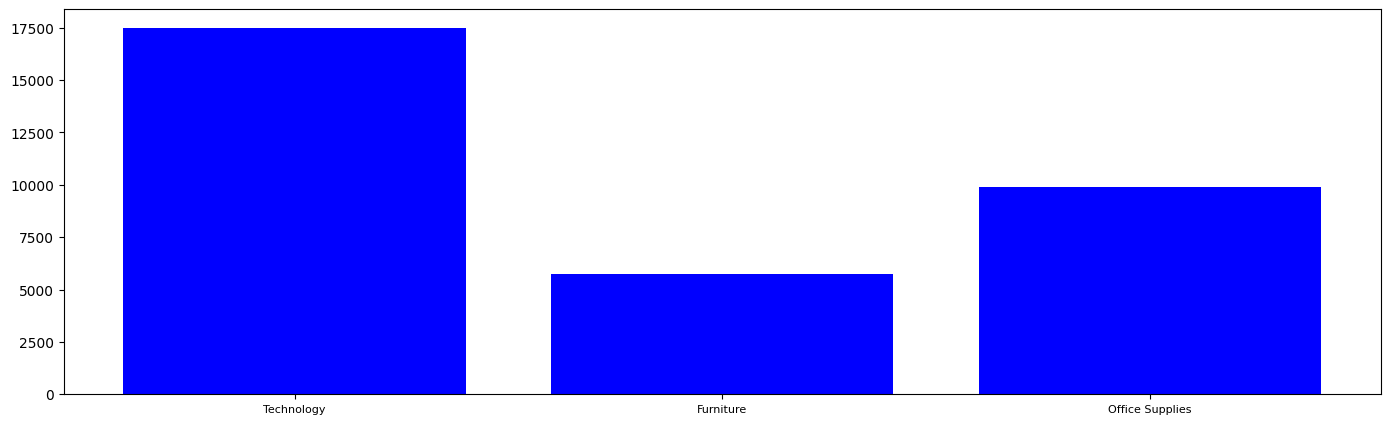

In [ ]:
plt.figure(figsize=(17, 5))
plt.bar(df['Category'],df['Sales'],color = 'b')
plt.xticks(size=8)
plt.show()

In [ ]:
df.groupby(['Category','Sub-Category']).sum()

Row ID  Postal Code         Sales  Quantity  \
Category        Sub-Category                                                 
Furniture       Bookcases     3043460     574219.0  256503.82300       785   
                Chairs        2934626    1406295.0  233656.58510       715   
                Furnishings     38499      14609.0     756.80000         5   
                Tables        2628661    1464745.0  220298.60630       598   
Office Supplies Appliances    2991469     405895.0  309698.48830       811   
                Binders        813895    1025148.0   69921.75800       113   
                Storage       1012127     292551.0   49037.81130       290   
                Supplies       191696     256415.0   19188.12800        35   
Technology      Accessories    963755     596098.0   56644.38840       244   
                Copiers       3740266    1340041.0  313404.10366       919   
                Machines      2113698    1015974.0  169343.78920       427   
                Phones        4581601     987392.0  463627.98190      1094   

                              Discount       Profit  Shipping Cost  
Category        Sub-Category                                        
Furniture       Bookcases         8.37  44316.45820       42455.02  
                Chairs           12.63  29667.50520       40305.51  
                Furnishings       0.00     75.68000         206.61  
                Tables           16.21  13683.55640       34820.73  
Office Supplies Appliances       11.59  54199.57290       46131.68  
                Binders           4.40  25192.77370        8382.97  
                Storage           2.34   6113.63050       11123.56  
                Supplies          0.40  -1503.66060        2305.54  
Technology      Accessories       1.57  14465.46240       11223.51  
                Copiers           8.56  83940.72976       48836.36  
                Machines          9.34  15810.99920       24663.12  
                Phones           13.40  84116.19590       66980.59